In [1]:
import numpy as np
import random

np.random.seed(42)

# Number of training examples
n = 1000

# Feature ranges
bet_size_variance = np.random.uniform(0, 1, n)  # Random values between 0 and 1
consecutive_losses = np.random.randint(0, 10, n)  # Integer values between 0 and 10
decision_time = np.random.uniform(0, 20, n)  # Random decision times between 0 and 20 seconds
sentiment_score = np.random.uniform(-1, 1, n)  # Sentiment score between -1 (negative) and 1 (positive)
session_duration = np.random.uniform(0, 5, n)  # Session duration between 0 and 5 hours
vpip = np.random.uniform(0, 1, n)  # VPIP between 0 and 1

# Generate labels (y) based on a diagonal decision boundary
# If the sum of VPIP and consecutive losses exceeds a threshold, it's more likely to be tilting
y_train = np.array([(0.7 * vpip[i] + 0.3 * consecutive_losses[i] / 10) > 0.5 for i in range(n)], dtype=int)

# Introduce noise: flip 1% of the labels randomly
indices_to_flip = np.random.choice(n, size=int(n * 0.01), replace=False)  # 1% of the data
y_train[indices_to_flip] = 1 - y_train[indices_to_flip]  # Flip the labels

# Combine the features into an array
x_train = np.column_stack((bet_size_variance, consecutive_losses, decision_time, sentiment_score, session_duration, vpip))

# Check the shape and content of the data
print(x_train.shape)
print(y_train[:10])  # Print the first few labels to check


(1000, 6)
[0 1 0 1 0 0 1 0 1 0]


In [2]:
# x_train = tilt_data[['bet_size_variance', 'consecutive_losses', 'decision_time', 'sentiment_score', 'session_duration', 'VPIP']].to_numpy()
# # y_train = tilt_data['tilt'].to_numpy()
# print(x_train[0 : 10]) # Only printing the first 10 values
# print(y_train)

# Understanding the data:

In [3]:
# As we know, x^(i) represents the ith training dataset.
# x^(i)_j represents the jth feature of the ith training set.

In [4]:
# x_1 is bet_size_variance
# x_2 is consecutive_losses
# x_3 is decision_time
# x_4 is sentiment_score (done using NLP)
# x_5 is session duration
# x_6 is VPIP
# and finally, for an x^(i), the given output y^(i) is 1 (if tiliting) and 0 (not tilting)

# Normalizing the data:

In [5]:
print([x[0] for x in x_train])

[0.3745401188473625, 0.9507143064099162, 0.7319939418114051, 0.5986584841970366, 0.15601864044243652, 0.15599452033620265, 0.05808361216819946, 0.8661761457749352, 0.6011150117432088, 0.7080725777960455, 0.020584494295802447, 0.9699098521619943, 0.8324426408004217, 0.21233911067827616, 0.18182496720710062, 0.18340450985343382, 0.3042422429595377, 0.5247564316322378, 0.43194501864211576, 0.2912291401980419, 0.6118528947223795, 0.13949386065204183, 0.29214464853521815, 0.3663618432936917, 0.45606998421703593, 0.7851759613930136, 0.19967378215835974, 0.5142344384136116, 0.5924145688620425, 0.046450412719997725, 0.6075448519014384, 0.17052412368729153, 0.06505159298527952, 0.9488855372533332, 0.9656320330745594, 0.8083973481164611, 0.3046137691733707, 0.09767211400638387, 0.6842330265121569, 0.4401524937396013, 0.12203823484477883, 0.4951769101112702, 0.034388521115218396, 0.9093204020787821, 0.2587799816000169, 0.662522284353982, 0.31171107608941095, 0.5200680211778108, 0.5467102793432796

In [6]:
# Fist, for bet size variance:
bet_size_variance_min = np.amin([x[0] for x in x_train])
bet_size_variance_max = np.amax([x[0] for x in x_train])

# Second, for consecutive losses:
consecutive_losses_min = np.amin([x[1] for x in x_train])
consecutive_losses_max = np.amax([x[1] for x in x_train])

# Third, for decision times:
decision_time_min = np.amin([x[2] for x in x_train])
decision_time_max = np.amax([x[2] for x in x_train])

# Fourth, for sentiment scores:
sentiment_score_min = np.amin([x[3] for x in x_train])
sentiment_score_max = np.amax([x[3] for x in x_train])

# Fifth, for session duration:
session_duration_min = np.amin([x[4] for x in x_train])
session_duration_max = np.amax([x[4] for x in x_train])

# Finally, for vpip:
vpip_min = np.amin([x[5] for x in x_train])
vpip_max = np.amax([x[5] for x in x_train])

In [7]:
# Applying min-max normalization to all the elements:
for x_i in x_train:
    # bet_size
    x_i[0] = (x_i[0] - bet_size_variance_min) / (bet_size_variance_max - bet_size_variance_min)
    # losses
    x_i[1] = (x_i[1] - consecutive_losses_min) / (consecutive_losses_max - consecutive_losses_min)
    # decision times
    x_i[2] = (x_i[2] - decision_time_min) / (decision_time_max - decision_time_min)
    # sentiment
    x_i[3] = (x_i[3] - sentiment_score_min) / (sentiment_score_max - sentiment_score_min)
    # duration
    x_i[4] = (x_i[4] - session_duration_min) / (session_duration_max - session_duration_min)
    # vpip
    x_i[5] = (x_i[5] - vpip_min) / (vpip_max - vpip_min)

print(x_train[0 : 10])

[[0.37173493 0.77777778 0.73869385 0.90829946 0.94043044 0.06970327]
 [0.95075462 0.22222222 0.35374893 0.94411852 0.82058153 0.90993572]
 [0.73095408 0.77777778 0.29693156 0.96056    0.98578539 0.18948723]
 [0.59696013 0.44444444 0.3501944  0.52168481 0.2602338  0.82161567]
 [0.15213426 0.         0.77590552 0.9777401  0.97191016 0.54455499]
 [0.15211002 0.66666667 0.66241978 0.75764249 0.43218912 0.07703583]
 [0.05371557 0.44444444 0.1853922  0.16173322 0.34828262 0.95602784]
 [0.86579896 0.55555556 0.17428612 0.47710504 0.05043386 0.24641031]
 [0.59942879 0.55555556 0.09843688 0.71864576 0.05285512 0.86007212]
 [0.70691458 0.77777778 0.66134998 0.247441   0.69356278 0.16813445]]


# Setting up the cost function

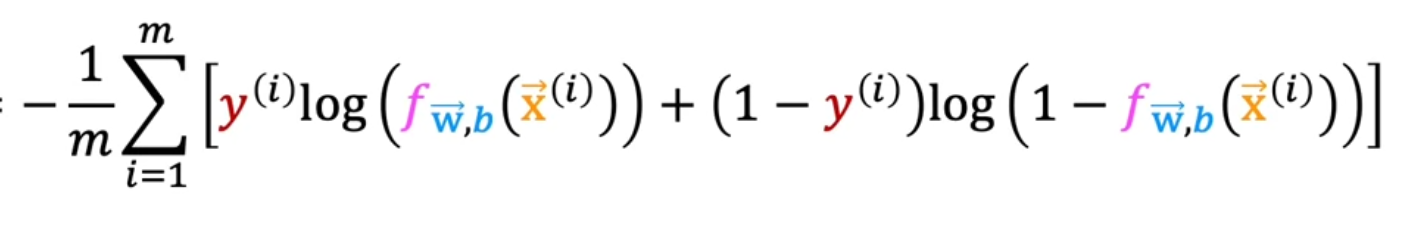

In [8]:
# First, initializing the values of w and b as 0
print(x_train.shape)
print(y_train.shape)

(1000, 6)
(1000,)


In [9]:
w_bar = np.zeros((6,))
for i in range(0, w_bar.shape[0]):
    w_bar[i] = float(2)
b = 1
print(w_bar)
print(b)

[2. 2. 2. 2. 2. 2.]
1


In [10]:
import math


m = x_train.shape[0]
# f(w_bar, x_bar) = g(w_bar • x_bar + b) = 1 / (1 + e ^ -(w_bar • x_bar + b))

def compute_cost(x_train, y_train, w_init, b_init):
    total_cost = 0
    
#     print(f'm = {m}, w_bar = {w_bar}, b = {b}')
    for i in range(0, m):
        f_linear = np.dot(w_init, x_train[i]) + b_init
        # print(np.exp(-1 * f_linear))
        f_wb = 1 / (1 + np.exp(-f_linear))
        # print(f_wb)
        cost = y_train[i] * np.log(f_wb) + (1 - y_train[i]) * np.log(1 - f_wb)
        total_cost += cost
    
    total_cost /= -1 * m
    return total_cost

In [11]:
initial_cost = compute_cost(x_train, y_train, w_bar, b)
print(initial_cost)

3.3872792691208575


# Applying Gradient Descent:

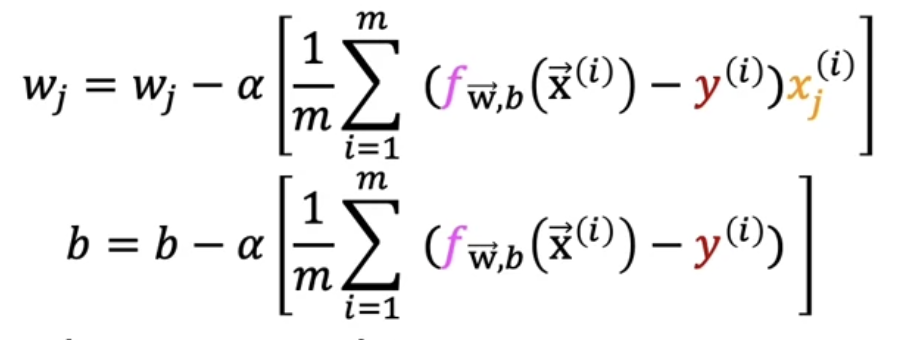

In [17]:
alpha = 0.1

def gradient_descent(x_train, y_train, w_bar, b):
    db = 0
    temp_w_list = np.zeros((x_train.shape[1],))
    for j in range(0, x_train.shape[1]):
        dw_j = 0
        for i in range(0, x_train.shape[0]):
            f_linear = np.dot(w_bar, x_train[i]) + b
            # print(np.exp(-1 * f_linear))
            f_wb = 1 / (1 + np.exp(-f_linear))
            dw_j += (f_wb - y_train[i]) * (x_train[i][j])
        dw_j /= m
        temp_w_list[j] = w_bar[j] - alpha * dw_j
    for i in range(0, x_train.shape[0]):
        f_linear = np.dot(w_bar, x_train[i]) + b
        # print(np.exp(-1 * f_linear))
        f_wb = 1 / (1 + np.exp(-f_linear))
        db += f_wb - y_train[i]
    db /= m
    temp_b = b - alpha * db
    b = temp_b
    for i in range(0, w_bar.shape[0]):
        w_bar[i] = temp_w_list[i]
    return (w_bar, b)

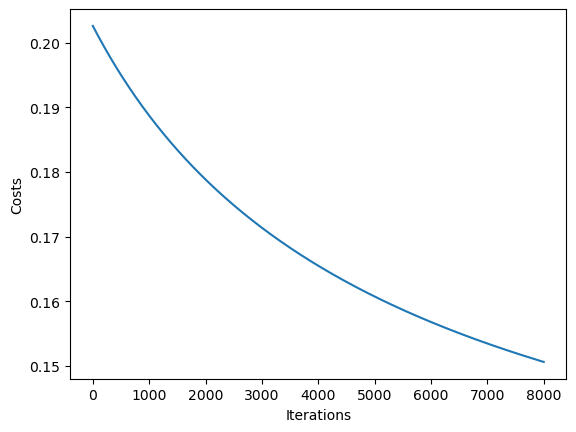

In [19]:
import matplotlib.pyplot as plt


i = 0
# w_bar, b = gradient_descent(x_train, y_train, w_bar, b)
costs = list()
while i < 8000:
    w_bar, b = gradient_descent(x_train, y_train, w_bar, b)
    cost = compute_cost(x_train, y_train, w_bar, b)
    costs.append(cost)
    i += 1
    
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Costs")
plt.show()
# print(compute_cost(x_train, y_train, w_bar, b))

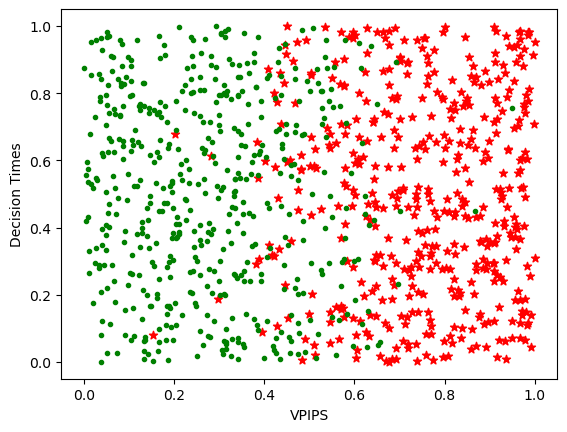

In [26]:
vpips_tilting = list()
decision_times_tilting = list()
vpips_not_tilting = list()
decision_times_not_tilting = list()
for i in range(0, len(x_train)):
    if y_train[i] == 1:
        vpips_tilting.append(x_train[i][5])
        decision_times_tilting.append(x_train[i][2])
    else:
        vpips_not_tilting.append(x_train[i][5])
        decision_times_not_tilting.append(x_train[i][2])
    
plt.scatter(x=vpips_tilting, y=decision_times_tilting, marker="*", c = 'r')
plt.scatter(x=vpips_not_tilting, y=decision_times_not_tilting, marker=".", c='green')
plt.xlabel("VPIPS")
plt.ylabel("Decision Times")
plt.show()

In [21]:
print(w_bar, b)
print(compute_cost(x_train, y_train, w_bar, b))

[-0.16525616  4.36269648 -0.09220894 -0.50050855 -0.29836963 13.7887167 ] -8.796164568311713
0.1506237094076843
